# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [36]:
#in dataset both the column has values in multiple of 10k

### Reading the dataset

In [37]:
#load dataset
df = pd.read_csv("/content/Data1.txt")
#naming the columns
df.columns=['Population','Profit']
df

,Population,Profit
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [38]:
#describe the dataframe
df.describe()

,Population,Profit
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


### Scatter plot of Population vs Profit

Text(0, 0.5, 'Profit')

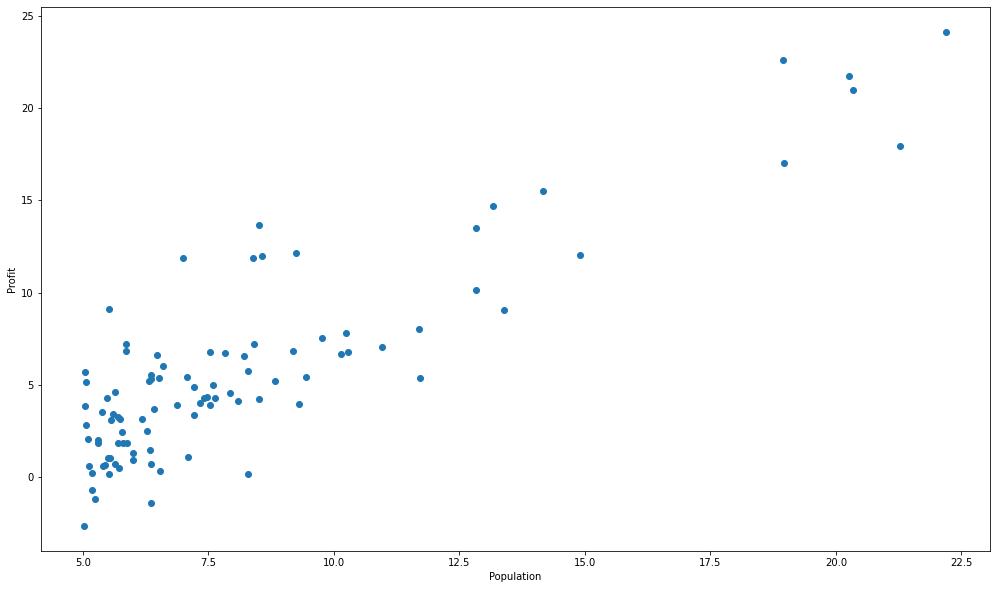

In [39]:
#plot
plt.figure(figsize=(17,10))
plt.scatter(df.Population,df.Profit)
plt.xlabel("Population")
plt.ylabel("Profit")

# what and why is the Text(0, 0.5, 'Profit') being printed? i also noted that if i write plt.show() its not printed

### Function to compute the cost function 

In [40]:
### Function to compute the cost function

def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))


### Appending 1s to the front of the dataset

In [41]:
#insert column with 1s
df.insert(0, 'Column of 1s', 1)
df

,Column of 1s,Population,Profit
0,1,5.5277,9.13020
1,1,8.5186,13.66200
2,1,7.0032,11.85400
3,1,5.8598,6.82330
4,1,8.3829,11.88600
...,...,...,...
91,1,5.8707,7.20290
92,1,5.3054,1.98690
93,1,8.2934,0.14454
94,1,13.3940,9.05510


### Set training data (X) and target variable (y)

In [42]:
noc=df.shape[1]
x=df.iloc[:,0:noc-1] #all rows of first column
x.head()
print(x.shape)

(96, 2)


In [43]:
y=df.iloc[:,noc-1:] #all rows of second column
y.head()
print(y.shape)

(96, 1)


### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [44]:
#converting x,y into numpy matrix
xmat = np.matrix(x.values)
ymat = np.matrix(y.values)
print(type(xmat))
print("Dimension=",xmat.ndim)
print("Shape=",xmat.shape)
print("Shape=",ymat.shape)

<class 'numpy.matrix'>
Dimension= 2
Shape= (96, 2)
Shape= (96, 1)


In [45]:
#converting theta into numpy matrix
#take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))
print(type(theta))
print("Dimension=",theta.ndim)
print("Shape=",theta.shape)
theta


<class 'numpy.matrix'>
Dimension= 2
Shape= (1, 2)


matrix([[0, 0]])

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [46]:
def gradientDescent(x, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)

    for i in range(iters):
      error = (x *theta.T)-y
      # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
      for j in range (parameters):
        term = np.multiply(error , x[: , j])
        temp[0,j] = theta[0,j] - ((alpha /len(x)) *np.sum(term))
        
      theta = temp
      cost[i] = computeCost(x,y,theta)
    
    return theta , cost



### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [47]:
# take alpha 0.01
alpha=0.01
# iters=1000
iters=1000


g, cost = gradientDescent(xmat,ymat,theta,alpha,iters)
print(g)
print(cost)



[[-3.50770466  1.14305609]]
[5.90146939 5.14906372 5.12066681 5.11400388 5.10801371 5.10206461
 5.09613757 5.09023193 5.0843476  5.07848451 5.07264258 5.06682172
 5.06102187 5.05524295 5.04948488 5.0437476  5.03803101 5.03233505
 5.02665965 5.02100473 5.01537022 5.00975603 5.00416211 4.99858837
 4.99303475 4.98750116 4.98198755 4.97649383 4.97101993 4.96556579
 4.96013133 4.95471648 4.94932117 4.94394533 4.93858889 4.93325178
 4.92793393 4.92263527 4.91735573 4.91209524 4.90685373 4.90163114
 4.89642739 4.89124242 4.88607616 4.88092855 4.87579951 4.87068898
 4.86559689 4.86052317 4.85546777 4.85043061 4.84541162 4.84041075
 4.83542792 4.83046307 4.82551614 4.82058706 4.81567577 4.8107822
 4.80590629 4.80104797 4.79620718 4.79138387 4.78657796 4.78178939
 4.7770181  4.77226403 4.76752711 4.76280729 4.7581045  4.75341868
 4.74874977 4.74409771 4.73946244 4.73484389 4.73024201 4.72565673
 4.721088   4.71653576 4.71199994 4.70748049 4.70297736 4.69849047
 4.69401977 4.6895652  4.68512671 4




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

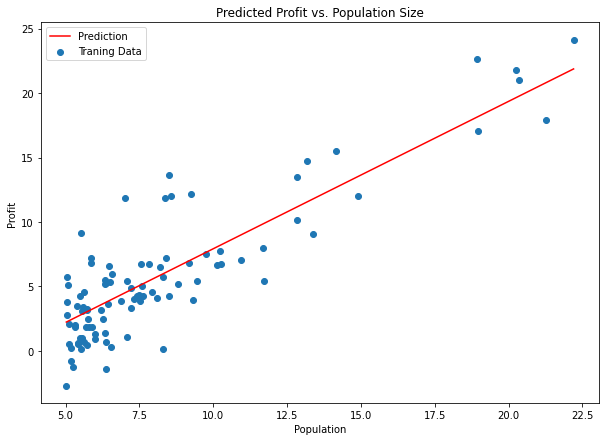

In [48]:
# linspace function will create an evenly-spaced series of points within the range of our data
x2 = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x2)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x2, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

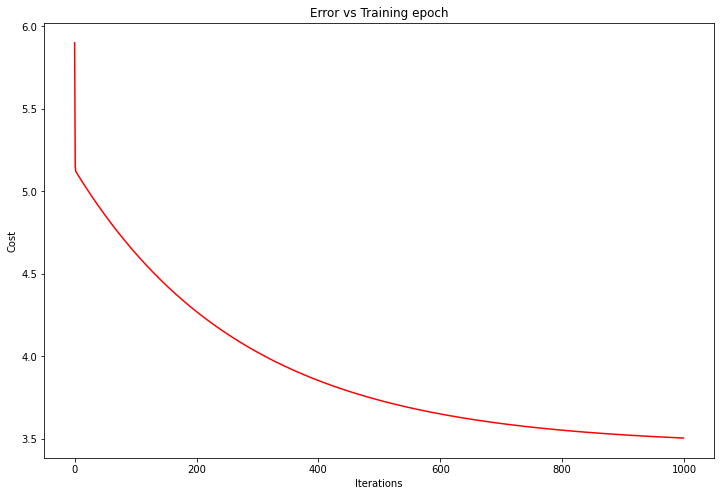

In [49]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [50]:
#fit the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression as lr
model =lr()
model.fit(X_train,y_train)

LinearRegression()

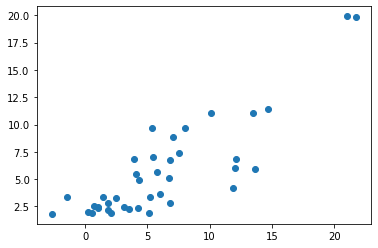

In [51]:
#predict the target values
predictions = model.predict(X_test)
plt.scatter(y_test,predictions)

In [52]:
#evaluate the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.2841255455612144
MSE: 8.938309813086402
RMSE: 2.989700622652108


In [53]:
#since the MAE error is the least, its the best for evaluating the model
#idk if theres any other way to find out which error is the best as asked in the question